# **Introduction**
---
#### In this notebook Machine Learning model is made using different algorithms like multilayer perceptron, SVM.


#### Installing and Updating requires packages

In [ ]:
!pip install keras --upgrade
!pip install tensorflow --upgrade
!pip install opencv-python==3.4.2.16
!pip install opencv-contrib-python==3.4.2.16

#### Importing libraries

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Dense
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
import csv
import random
import sklearn as sk
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report as cr
import cv2
import matplotlib.pyplot as plt


In [ ]:
#@title Helper Functions {display-mode: "form"}

#@markdown `readFile(filename)`

#@markdown `counter(i)`

#@markdown `getQueryIdx(match)`

#@markdown `getUnique(ft)`

# This code will be hidden when the notebook is loaded.
def readFile(filename):
    data = pd.read_csv(filename,header=None)
    data = data.values
    return data

def counter(i):
    '''
    Counting in Loop and printing count dynamically
    E.g. :
        >>> 1
        >>> 2
    '''
    sys.stdout.write(f'\r{i}')
    sys.stdout.flush()

def giveQueryIdx(match):
    '''
    Function for getting index of query_image in match object
    '''
    try:
        return match.queryIdx
    except ValueError as e:
        print("Zero value matrix")
    
getQueryIdx = np.vectorize(giveQueryIdx)

def getUnique(ft):
    bf = cv2.BFMatcher(cv2.NORM_HAMMING,crossCheck=True)
    uni = []
    ft = ft.astype(np.uint8)
    for k in range(len(ft)):
        try:
            # if k in red:
            #     continue
            # # else:
            ft0 = ft[0]
            ft0 = ft0.astype(np.uint8)
            ft0 = np.reshape(ft0,(1,32))

            matches = bf.match(ft[1:], ft0)
            # print(getQueryIdx(matches))
            uni.append(ft0[0])
            ft = np.delete(ft[1:],getQueryIdx(matches),0)
            # print(len(ft))
            # print(getQueryIdx(matches))
        except Exception as e:
            # print(e)
            break
    # uni = np.reshape(uni,(-1,32))
    uni = np.array(uni)
    # print(ft)
    return uni

#### More features Training

##### Importing Data for more features

In [ ]:
msg_more = pd.read_csv(f'/content/drive/MyDrive/results/supersetforgun_ORB.csv ',header = None).values
msk_more = pd.read_csv(f'/content/drive/MyDrive/results/supersetforknifemoref_ORB.csv ', header = None).values

# Remove the excess data from gun or knife depending upon no of features

X_knife_train_more = msk_more
X_gun_train_more = msg_more[:33334]

In [ ]:
X_train_more = np.append(X_knife_train_more,X_gun_train_more,axis=0)
Y_train_more = np.append(np.ones((len(X_knife_train_more),1)),np.zeros((len(X_gun_train_more),1)),axis=0)

c = list(zip(X_train_more,Y_train_more))
random.shuffle(c)
# X_train_more.shape
X_train_more,Y_train_more = zip(*c)
X_train_more = np.array(X_train_more)
Y_train_more = np.array(Y_train_more)

##### Making Validation data (Common for both types i.e. more features and less features)

In [ ]:
randomlist_gun = [609, 555, 210, 279, 203, 709, 277, 122, 121, 256, 356, 529, 571, 35, 318, 104, 434, 586, 94, 153, 745, 327, 296, 417, 692, 24, 627, 559, 138, 450, 668, 602, 760, 55, 157, 346, 543, 286, 108, 284, 184, 716, 255, 115, 448, 585, 623, 561, 499, 606, 640, 15, 307, 85, 442, 13, 384, 492, 332, 548, 40, 1, 32, 407, 464, 532, 703, 322, 477, 480, 772, 14, 713, 10, 105, 6, 616, 126, 343, 757, 537, 678, 513, 338, 486, 432, 786, 715, 125, 147, 461, 283, 339, 161, 226, 495, 186, 202, 769, 482, 631, 8, 791, 781, 362, 444, 662, 77, 679, 201, 44, 217, 109, 141, 146, 488, 514, 316, 765, 527, 369, 101, 549, 677, 796, 724, 597, 443, 725, 558, 701, 333, 566, 758, 749, 309, 660, 380, 227, 771, 207, 240, 132, 225, 607, 347, 552, 142, 278, 42, 246, 463, 354, 136, 96, 429, 645, 469, 385, 508]
randomlist_knife = [381, 92, 507, 192, 818, 618, 516, 674, 32, 825, 452, 858, 668, 685, 497, 119, 373, 872, 454, 839, 477, 749, 779, 148, 141, 426, 443, 414, 854, 372, 742, 541, 522, 691, 876, 725, 582, 750, 369, 652, 25, 348, 683, 857, 106, 613, 231, 827, 236, 810, 10, 493, 267, 69, 759, 440, 621, 286, 58, 317, 266, 263, 143, 105, 139, 298, 325, 635, 442, 303, 654, 270, 595, 570, 512, 764, 154, 503, 12, 338, 804, 402, 671, 432, 242, 765, 653, 676, 563, 363, 82, 182, 341, 288, 75, 585, 306, 180, 215, 494, 677, 193, 390, 465, 710, 90, 680, 682, 633, 123, 670, 247, 650, 718, 632, 43, 479, 826, 841, 865, 252, 625, 280, 207, 173, 316, 122, 155, 728, 689, 55, 754, 398, 501, 56, 672, 329, 462, 228, 365, 88, 423, 870, 418, 540, 776, 531, 873, 431, 637, 457, 361, 845, 101, 293, 753, 33, 188, 612, 559]

In [ ]:
unique_flag = False
# Y_test = []
feature_count = 0
try:
    if unique_flag:
        fts = readFile(f'/content/drive/My Drive/results/features_knife_ORB/{randomlist_knife[0]}.csv')
        fts = getUnique(fts)
        X_test = fts
        # feature_count = 
        # Y_test.append(1)
        Y_test = np.ones((fts.shape[0],1))
    else:
        fts = readFile(f'/content/drive/My Drive/results/features_knife_ORB/{randomlist_knife[0]}.csv')
        X_test = fts
        # Y_test.append(1)

except Exception as e:
    print(e)

for im in randomlist_knife[1:]:
    try:
        if unique_flag:
            fts = readFile(f'/content/drive/My Drive/results/features_knife_ORB/{im}.csv')
            fts = getUnique(fts)
            
        else:
            fts = readFile(f'/content/drive/My Drive/results/features_knife_ORB/{im}.csv')
        X_test = np.append(X_test,fts,axis=0)
        # Y_test.append(1)
        Y_test = np.append(Y_test,np.ones((fts.shape[0],1)),axis=0)

    except Exception as e:
        # print(e)
        pass



for im in randomlist_gun:
    try:
        if unique_flag:
            fts = readFile(f'/content/drive/My Drive/results/features_gun_2_ORB/{im}.csv')
            fts = getUnique(fts)
            
        else:
            fts = readFile(f'/content/drive/My Drive/results/features_gun_2_ORB/{im}.csv')
        X_test = np.append(X_test,fts,axis=0)
        # Y_test.append(0) 
        Y_test = np.append(Y_test,np.zeros((fts.shape[0],1)),axis=0)
        # print(0)       
    except Exception as e:
        # print(e)
        pass

##### Defining ANN Model

In [ ]:
from numpy.random import seed
seed(105)
tf.random.set_seed(105)
# from tensorflow import set_random_seed
# set_random_seed(2)

In [ ]:
# tf.random.set_seed(101)
inp_shape = (X_train_more.shape[1],)
model1 = Sequential()
# model.add(LayerNormalization(input_shape=inp_shape))
# model.add(Dense(150,activation='relu',input_shape=inp_shape))
model1.add(Dense(40,activation='relu',input_shape = inp_shape))
model1.add(Dense(25,activation='relu'))
# model.add(Dense(200,activation='relu'))
model1.add(Dense(12,activation='relu'))
model1.add(Dense(1,activation='sigmoid'))

In [ ]:
model1.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 40)                1320      
_________________________________________________________________
dense_25 (Dense)             (None, 25)                1025      
_________________________________________________________________
dense_26 (Dense)             (None, 12)                312       
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 13        
Total params: 2,670
Trainable params: 2,670
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

##### Training Model and analysing training and validation process

In [ ]:
history = model1.fit(x=X_train_more, y=Y_train_more, validation_data=(X_test,Y_test),batch_size=32, epochs=15, verbose=1)

Epoch 1/15
2084/2084 [==============================] - 4s 2ms/step - loss: 1.0257 - accuracy: 0.5167 - val_loss: 0.6735 - val_accuracy: 0.5971
Epoch 2/15
2084/2084 [==============================] - 4s 2ms/step - loss: 0.6944 - accuracy: 0.5422 - val_loss: 0.7319 - val_accuracy: 0.4462
Epoch 3/15
2084/2084 [==============================] - 4s 2ms/step - loss: 0.6868 - accuracy: 0.5582 - val_loss: 0.6965 - val_accuracy: 0.4939
Epoch 4/15
2084/2084 [==============================] - 4s 2ms/step - loss: 0.6763 - accuracy: 0.5745 - val_loss: 0.7446 - val_accuracy: 0.3990
Epoch 5/15
2084/2084 [==============================] - 4s 2ms/step - loss: 0.6697 - accuracy: 0.5876 - val_loss: 0.7045 - val_accuracy: 0.5052
Epoch 6/15
2084/2084 [==============================] - 4s 2ms/step - loss: 0.6639 - accuracy: 0.5983 - val_loss: 0.7064 - val_accuracy: 0.5117
Epoch 7/15
2084/2084 [==============================] - 4s 2ms/step - loss: 0.6580 - accuracy: 0.6071 - val_loss: 0.6814 - val_accuracy:

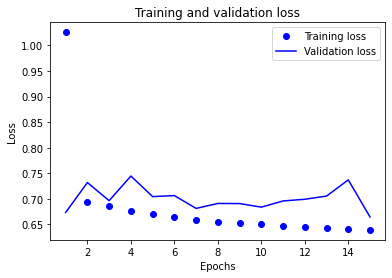

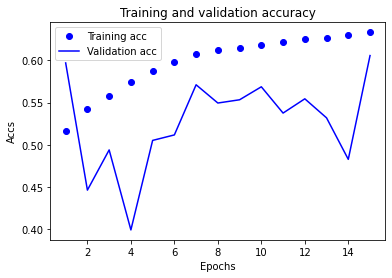

In [ ]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values)+1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
# plt.show()
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# plt.savefig(f'/content/hist_{i}.jpg')
# i = i+1
plt.show()
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accs')
plt.legend()
plt.show()

##### Saving the model

In [ ]:
model1.save('/content/drive/My Drive/results/model1_more_26_11')


INFO:tensorflow:Assets written to: /content/drive/My Drive/results/model1_more_26_11/assets


In [ ]:
# model1 = load_model('/content/drive/My Drive/results/model1_more_25_11')

##### Testing the model

In [ ]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING,crossCheck=True)
pred = []
actual = []
accs = []
label = 'more'
# unique_flag = True
for im in randomlist_knife:
    try:
        if unique_flag:
            fts = readFile(f'/content/drive/My Drive/results/features_knife_ORB/{im}.csv')
            fts = getUnique(fts)
        else:
            fts = readFile(f'/content/drive/My Drive/results/features_knife_ORB/{im}.csv')

        # fts = np.array(im)
        # fts = np.reshape(fts,(-1,32))
        if len(fts)>200:
            label = 'more'
        else:
            label = 'less'
        test = model1.predict(fts)
        # acc.append(np.sum(test)/len(test))
        test[np.where(test<0.5)] = 0
        test[np.where(test>0.5)] = 1
        # print(test)
        temp = np.sum(test)/len(test)
        # print(temp)
        actual.append(1)
        if temp < 0.5:
            pred.append(0)
            accs.append(['knife','gun',temp,0,label])
        else:
            pred.append(1)
            # accs.append(('knife',temp,1,im))

            accs.append(['knife','knife',temp,1,label])
    except:
        continue
     

for im in randomlist_gun:
    # fts = readFile(f'/content/drive/My Drive/results/features_gun_2_ORB/{im}.csv')
    try:
        if unique_flag:
            fts = readFile(f'/content/drive/My Drive/results/features_gun_2_ORB/{im}.csv')
            fts = getUnique(fts)
        else:
            fts = readFile(f'/content/drive/My Drive/results/features_gun_2_ORB/{im}.csv')

        test = model1.predict(fts)

        if len(fts)>200:
            label = 'more'
        else:
            label = 'less'


        # acc.append(1-np.sum(test)/len(test))
        test[np.where(test<0.5)] = 0
        test[np.where(test>0.5)] = 1
        
        temp = np.sum(test)/len(test)
        actual.append(0)
        # accs.append(temp)

        if temp < 0.5:
            pred.append(0)
            accs.append(['gun', 'gun', temp, 0, label])
            # accs.append(('gun',temp,0))
        else:
            pred.append(1)
            accs.append(['gun', 'knife', temp, 1, label])
        # accs.append(('gun',temp,1))
    except:
        pass        

In [ ]:
print(confusion_matrix(actual,pred))
names = [0,1]
a = cr(actual,pred,names)
print(a)

[[160   0]
 [142   9]]
              precision    recall  f1-score   support

           0       0.53      1.00      0.69       160
           1       1.00      0.06      0.11       151

    accuracy                           0.54       311
   macro avg       0.76      0.53      0.40       311
weighted avg       0.76      0.54      0.41       311



#### Less Features Training

In [ ]:
msg_less = pd.read_csv(f'/content/drive/My Drive/results/supersetforgunlessf_ORB.csv ',header = None).values
msk_less = pd.read_csv(f'/content/drive/My Drive/results/supersetforknifelessf_ORB.csv ', header = None).values

X_gun_train_less = msg_less
# random.shuffle(msk)
X_knife_train_less = msk_less[:2487]

In [ ]:
msg_less.shape

(2487, 32)

In [ ]:
X_train_less = np.append(X_knife_train_less,X_gun_train_less,axis=0)
Y_train_less = np.append(np.ones((len(X_knife_train_less),1)),np.zeros((len(X_gun_train_less),1)),axis=0)

c = list(zip(X_train_less,Y_train_less))
random.shuffle(c)
# X_train_less.shape
X_train_less,Y_train_less = zip(*c)
X_train_less = np.array(X_train_less)
Y_train_less = np.array(Y_train_less)

In [ ]:
X_train_less.shape

(4974, 32)

In [ ]:
from numpy.random import seed
seed(45)
tf.random.set_seed(45)

In [ ]:
# tf.random.set_seed(101)
inp_shape = (X_train_less.shape[1],)
model2 = Sequential()
# model.add(LayerNormalization(input_shape=inp_shape))
# model.add(Dense(150,activation='relu',input_shape=inp_shape))
model2.add(Dense(40,activation='relu',input_shape = inp_shape))
model2.add(Dense(25,activation='relu'))
# model.add(Dense(200,activation='relu'))
model2.add(Dense(12,activation='relu'))
model2.add(Dense(1,activation='sigmoid'))

In [ ]:
model2.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 40)                1320      
_________________________________________________________________
dense_41 (Dense)             (None, 25)                1025      
_________________________________________________________________
dense_42 (Dense)             (None, 12)                312       
_________________________________________________________________
dense_43 (Dense)             (None, 1)                 13        
Total params: 2,670
Trainable params: 2,670
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model2.fit(x=X_train_less, y=Y_train_less, validation_data=(X_test,Y_test),batch_size=32, epochs=15, verbose=1)

Epoch 1/15
156/156 [==============================] - 2s 10ms/step - loss: 3.5179 - accuracy: 0.5285 - val_loss: 1.3524 - val_accuracy: 0.5425
Epoch 2/15
156/156 [==============================] - 2s 10ms/step - loss: 0.9011 - accuracy: 0.5881 - val_loss: 0.9861 - val_accuracy: 0.5611
Epoch 3/15
156/156 [==============================] - 2s 11ms/step - loss: 0.7422 - accuracy: 0.6140 - val_loss: 0.9185 - val_accuracy: 0.5986
Epoch 4/15
156/156 [==============================] - 2s 11ms/step - loss: 0.6745 - accuracy: 0.6267 - val_loss: 0.8304 - val_accuracy: 0.5639
Epoch 5/15
156/156 [==============================] - 2s 11ms/step - loss: 0.6723 - accuracy: 0.6214 - val_loss: 0.8332 - val_accuracy: 0.5997
Epoch 6/15
156/156 [==============================] - 2s 11ms/step - loss: 0.6409 - accuracy: 0.6383 - val_loss: 0.8450 - val_accuracy: 0.5413
Epoch 7/15
156/156 [==============================] - 2s 11ms/step - loss: 0.6465 - accuracy: 0.6293 - val_loss: 0.8913 - val_accuracy: 0.5383

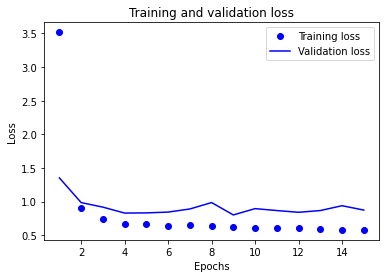

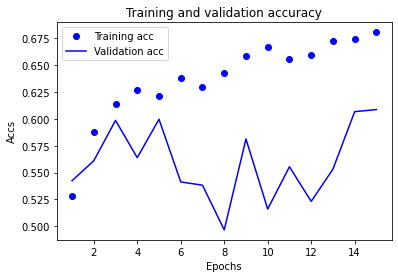

In [ ]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values)+1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
# plt.show()
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# plt.savefig(f'/content/hist_{i}.jpg')
# i = i+1
plt.show()
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accs')
plt.legend()
plt.show()

In [ ]:
model2.save('/content/drive/My Drive/results/model2_more_26_11')

INFO:tensorflow:Assets written to: /content/drive/My Drive/results/model2_more_26_11/assets


In [ ]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING,crossCheck=True)
pred = []
actual = []
accs = []
label = 'more'
# unique_flag = True
for im in randomlist_knife:
    try:
        if unique_flag:
            fts = readFile(f'/content/drive/My Drive/results/features_knife_ORB/{im}.csv')
            fts = getUnique(fts)
        else:
            fts = readFile(f'/content/drive/My Drive/results/features_knife_ORB/{im}.csv')

        # fts = np.array(im)
        # fts = np.reshape(fts,(-1,32))
        if len(fts)>200:
            label = 'more'
        else:
            label = 'less'
        test = model2.predict(fts)
        # acc.append(np.sum(test)/len(test))
        test[np.where(test<0.5)] = 0
        test[np.where(test>0.5)] = 1
        # print(test)
        temp = np.sum(test)/len(test)
        # print(temp)
        actual.append(1)
        if temp < 0.5:
            pred.append(0)
            accs.append(['knife','gun',temp,0,label])
        else:
            pred.append(1)
            # accs.append(('knife',temp,1,im))

            accs.append(['knife','knife',temp,1,label])
    except:
        continue
     

for im in randomlist_gun:
    # fts = readFile(f'/content/drive/My Drive/results/features_gun_2_ORB/{im}.csv')
    try:
        if unique_flag:
            fts = readFile(f'/content/drive/My Drive/results/features_gun_2_ORB/{im}.csv')
            fts = getUnique(fts)
        else:
            fts = readFile(f'/content/drive/My Drive/results/features_gun_2_ORB/{im}.csv')

        test = model2.predict(fts)

        if len(fts)>200:
            label = 'more'
        else:
            label = 'less'


        # acc.append(1-np.sum(test)/len(test))
        test[np.where(test<0.5)] = 0
        test[np.where(test>0.5)] = 1
        
        temp = np.sum(test)/len(test)
        actual.append(0)
        # accs.append(temp)

        if temp < 0.5:
            pred.append(0)
            accs.append(['gun', 'gun', temp, 0, label])
            # accs.append(('gun',temp,0))
        else:
            pred.append(1)
            accs.append(['gun', 'knife', temp, 1, label])
        # accs.append(('gun',temp,1))
    except:
        pass        

In [ ]:
print(confusion_matrix(actual,pred))
names = [0,1]
a = cr(actual,pred,names)
print(a)

[[160   0]
 [142   9]]
              precision    recall  f1-score   support

           0       0.53      1.00      0.69       160
           1       1.00      0.06      0.11       151

    accuracy                           0.54       311
   macro avg       0.76      0.53      0.40       311
weighted avg       0.76      0.54      0.41       311

